# Melbourne Housing Dataset
In this task, we have a real estate dataset in which we expect to have some missing data that need to be dealt with, so we need to do some data preprocessing and then jump to train our model to be able to predict prices.

So, what are we waiting for, let's go!

In [1]:
# Let's import our libraries:
import numpy as np # For numerical fast numerical calculations
import matplotlib.pyplot as plt # For making plots
import pandas as pd # Deals with data
import seaborn as sns # Makes beautiful plots

In [2]:
# Now let's call our dataset and cast it into a DataFrame:
data = pd.read_csv("melb_data.csv")
data

Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Biggin   3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0   
1        Biggin   4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0   
2        Biggin   4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0   
3        Biggin   4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0   
4        Nelson   4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0   
...         ...         ...       ...       ...  ...       ...  ...       ...   
13575     Barry  26/08/2017      16.7    3150.0  ...       2.0  2.0     652.0   
13576  Williams  26/08/2017       6.8    3016.0  ...       2.0  2.0     333.0   
13577     Raine  26/08/2017       6.8    3016.0  ...       2.0  4.0     436.0   
13578   Sweeney  26/08/2017       6.8    3016.0  ...       1.0  5.0     866.0   
13579   Village  26/08/2017       6.3    3013.0  ...       1.0  1.0     362.0   

       BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
0               NaN        NaN        Yarra -37.79960   144.99840   
1              79.0     1900.0        Yarra -37.80790   144.99340   
2             150.0     1900.0        Yarra -37.80930   144.99440   
3               NaN        NaN        Yarra -37.79690   144.99690   
4             142.0     2014.0        Yarra -37.80720   144.99410   
...             ...        ...          ...       ...         ...   
13575           NaN     1981.0          NaN -37.90562   145.16761   
13576         133.0     1995.0          NaN -37.85927   144.87904   
13577           NaN     1997.0          NaN -37.85274   144.88738   
13578         157.0     1920.0          NaN -37.85908   144.89299   
13579         112.0     1920.0          NaN -37.81188   144.88449   

                       Regionname Propertycount  
0           Northern Metropolitan        4019.0  
1           Northern Metropolitan        4019.0  
2           Northern Metropolitan        4019.0  
3           Northern Metropolitan        4019.0  
4           Northern Metropolitan        4019.0  
...                           ...           ...  
13575  South-Eastern Metropolitan        7392.0  
13576        Western Metropolitan        6380.0  
13577        Western Metropolitan        6380.0  
13578        Western Metropolitan        6380.0  
13579        Western Metropolitan        6543.0  

[13580 rows x 21 columns]

In [3]:
# Let's have a look at our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
data.shape

(13580, 21)

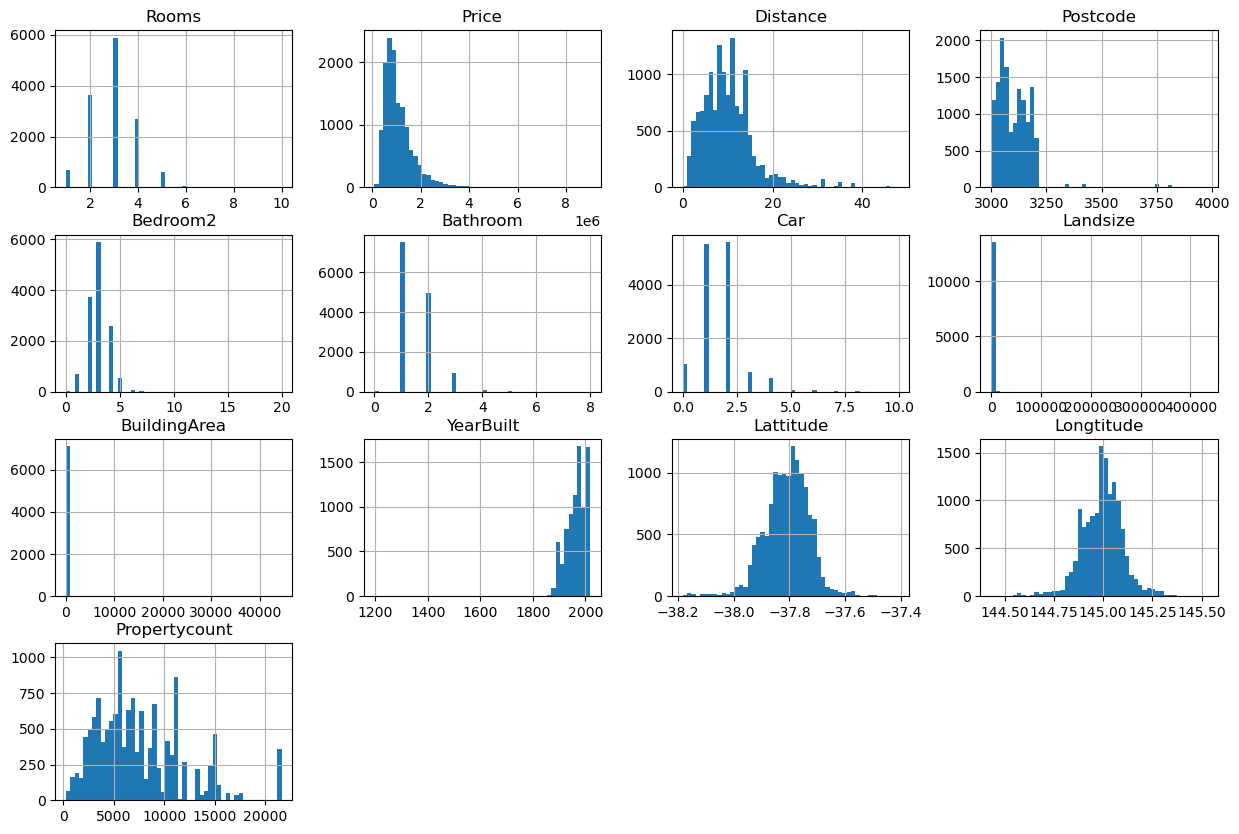

In [5]:
# Let's explore our data distribution:
data.hist(bins = 50 , figsize= (15,10))

plt.show()

In [6]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

<Axes: >

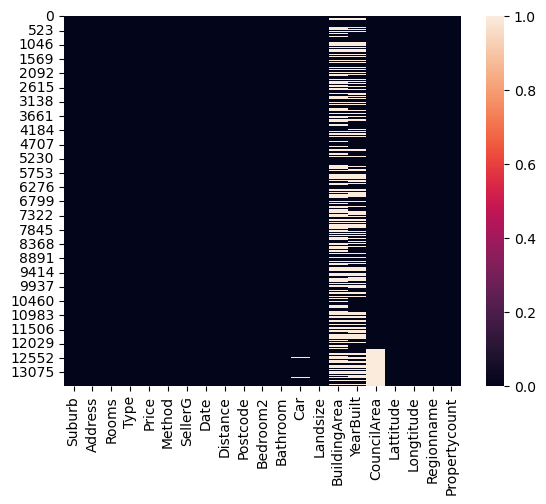

In [7]:
sns.heatmap(data.isnull())

We can notice that we have missing values in the following features:
- Car (minor)
- BuildingArea (major)
- YearBuilt (major)
- CouncilArea (normal)

We can feel free to drop the car feature's missing values but we are not gonna do that ;D 

Now let's start cleaning our data:

### 1- "Car" Feature

In [8]:
# Let's make a copy of our DataFrame for backup:
back_up = data.copy()

<Axes: xlabel='Car', ylabel='count'>

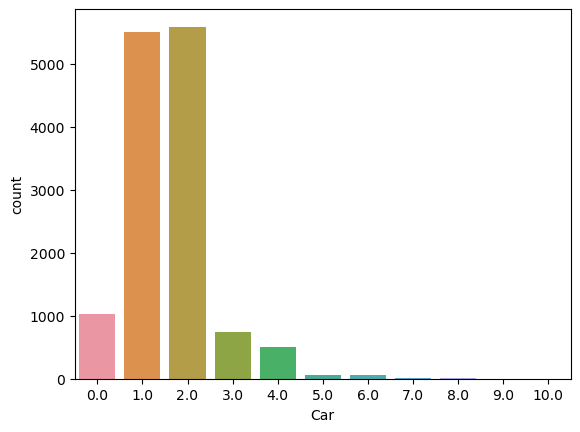

In [9]:
sns.countplot(x = data['Car'])

### Note That:
We are not supposed to use the denisty plot (distplot) with discrete or categorical values, it's usually used with continuous values only.

In [10]:
data.Car.value_counts()

2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

In [11]:
# Let's try the imputation method with the median:
data['Car'] = data['Car'].fillna(data['Car'].mean())

<Axes: xlabel='Car', ylabel='count'>

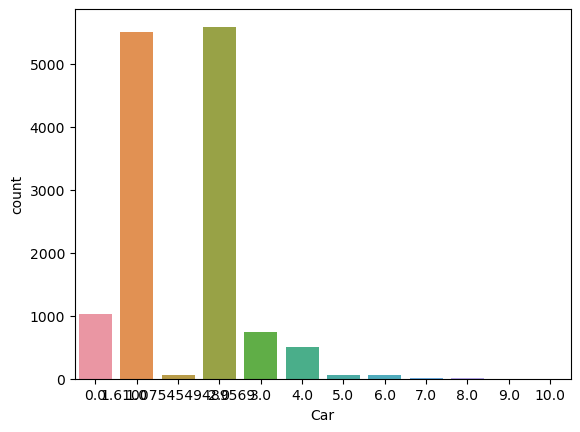

In [12]:
sns.countplot(x = data['Car'])

In [13]:
data.Car.isnull().value_counts()

False    13580
Name: Car, dtype: int64

Nice! now we have solved one, 3 to go:

### 2- "BuildingArea" Feature

In [14]:
back_up_2 = data.copy() # Make a second backup for a checkpoint

In [15]:
data.BuildingArea.isnull().value_counts()

False    7130
True     6450
Name: BuildingArea, dtype: int64

<Axes: xlabel='BuildingArea', ylabel='Count'>

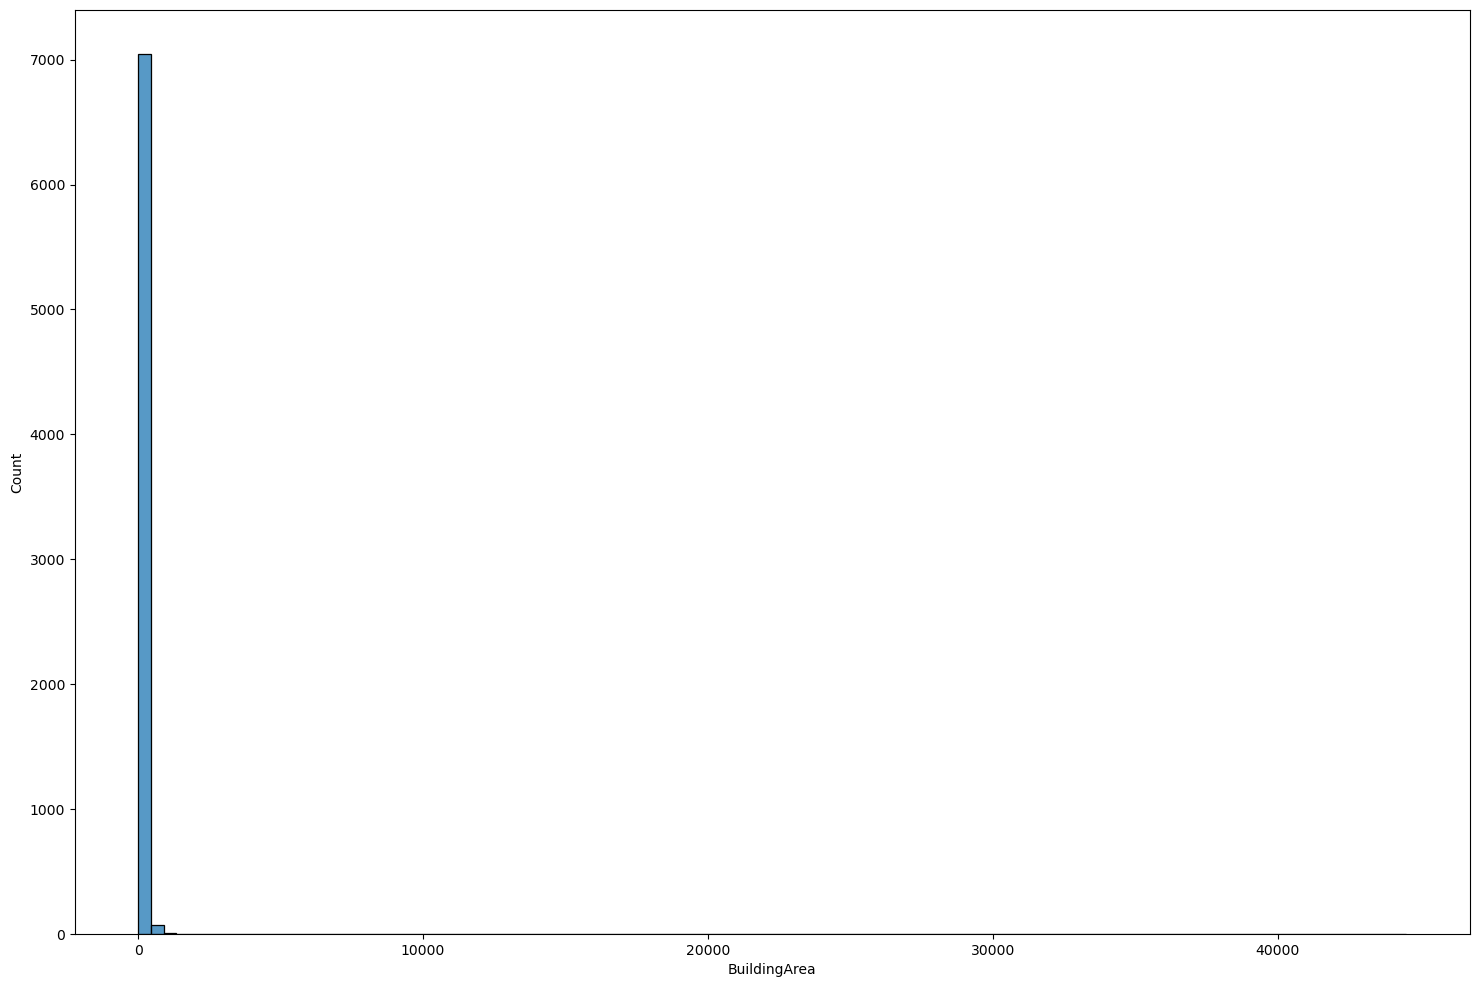

In [16]:
plt.figure(figsize=(18,12)) 
sns.histplot(data['BuildingArea'], bins = 100)

In [17]:
data.BuildingArea.value_counts()

120.00    114
110.00     89
100.00     88
130.00     84
115.00     77
         ... 
255.79      1
424.00      1
186.36      1
147.20      1
368.00      1
Name: BuildingArea, Length: 602, dtype: int64

In [18]:
# Let's try the imputation method with the median:
data['BuildingArea'] = data['BuildingArea'].fillna(data['BuildingArea'].mean())

<Axes: xlabel='BuildingArea', ylabel='Count'>

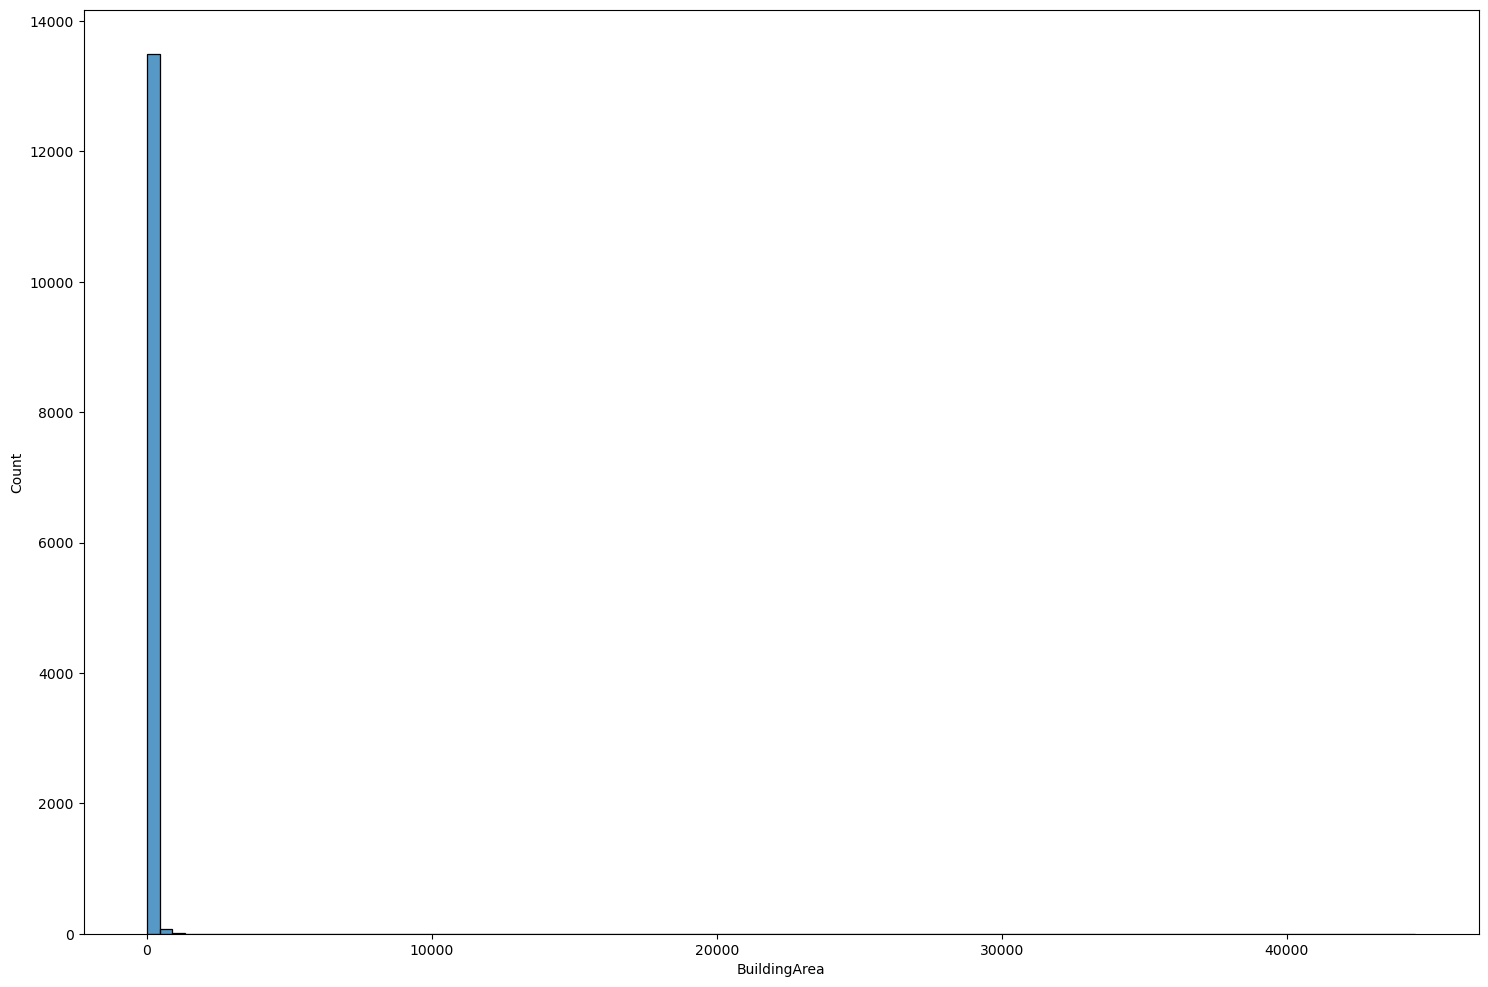

In [19]:
plt.figure(figsize=(18,12)) 
sns.histplot(data['BuildingArea'], bins = 100)

In [20]:
data.BuildingArea.isnull().value_counts()

False    13580
Name: BuildingArea, dtype: int64

We notice that the destribution is almost the same but the data has been scaled up; and that's due to the added (filled) values, which are so many.



#### Note: it's not recomended to fill with the mean in case we have many missing values.

So let's double-check by using another technique

In [21]:
# First, let's get our data back to the last checkpoint:
data = back_up_2

In [22]:
# Let's check that everything is back:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [23]:
# Ok, let's begin with the randomized Pandas series technique:
fill_list= data['BuildingArea'].dropna()
data["BuildingArea"] = data['BuildingArea'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

In [24]:
data.BuildingArea.isnull().value_counts()

False    13580
Name: BuildingArea, dtype: int64

<Axes: xlabel='BuildingArea', ylabel='Count'>

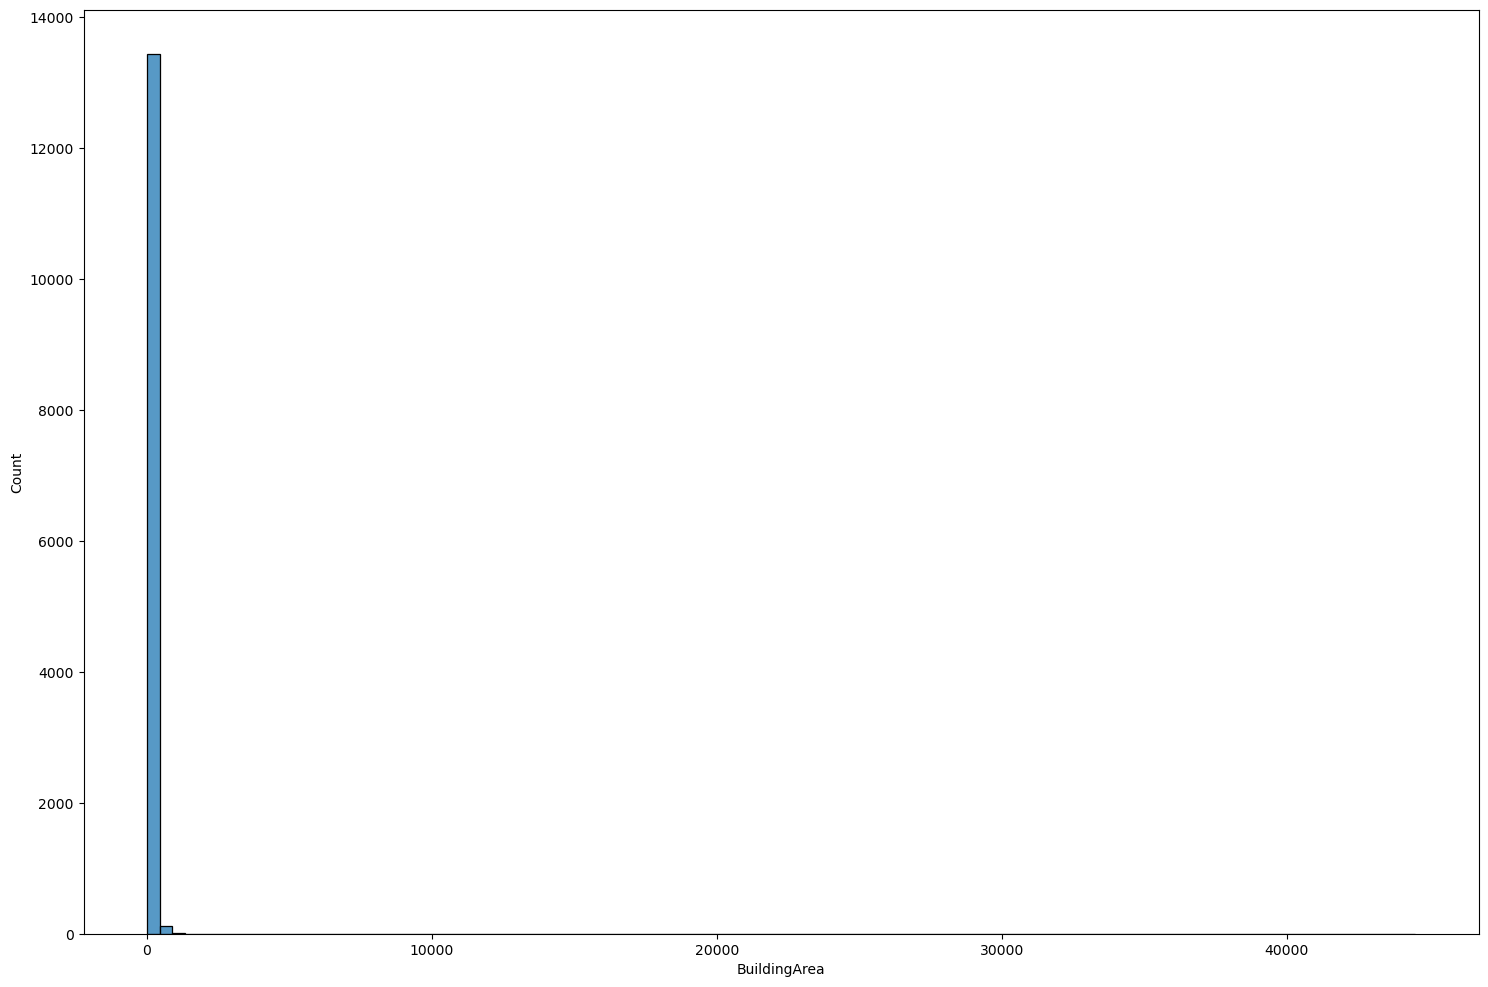

In [25]:
# Let's check the distribution:
plt.figure(figsize=(18,12)) 
sns.histplot(data['BuildingArea'], bins = 100)

In [26]:
data.BuildingArea.value_counts()

120.00    213
110.00    178
100.00    175
130.00    163
115.00    155
         ... 
105.23      1
210.68      1
113.81      1
341.00      1
368.00      1
Name: BuildingArea, Length: 602, dtype: int64

It's still scaled down but in a smaller ratio, so this is more accurate.

### 3- "YearBuilt" Feature

In [27]:
# Again let's save our checkpoint:
back_up_3 = data.copy()

In [28]:
data = back_up_3

<Axes: xlabel='YearBuilt', ylabel='Count'>

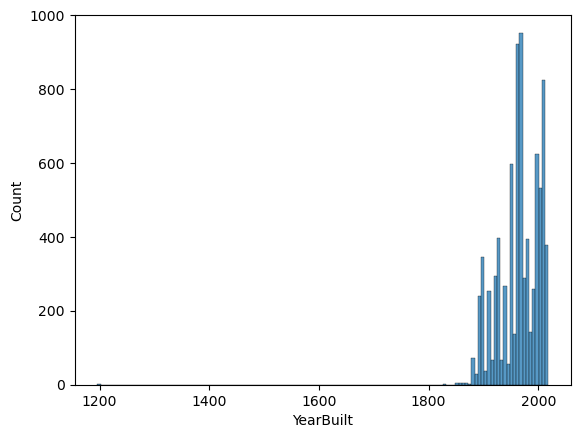

In [29]:
sns.histplot(data['YearBuilt'])

In [30]:
data.YearBuilt.isnull().sum()

5375

In [31]:
# Let's jump directly to the randomized Pandas series technique:
fill_list= data['YearBuilt'].dropna()
data["YearBuilt"] = data['YearBuilt'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))


In [32]:
data.YearBuilt.isnull().sum()

0

<Axes: xlabel='YearBuilt', ylabel='Count'>

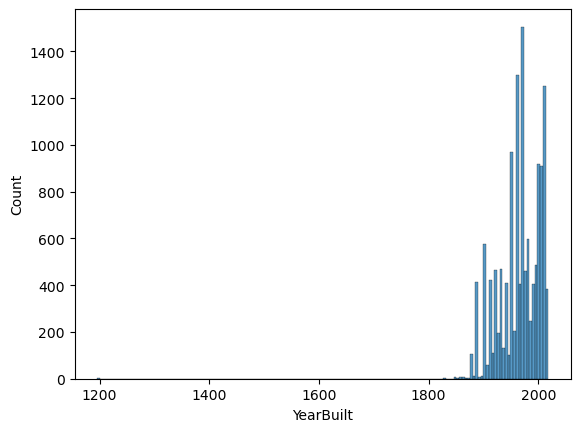

In [33]:
sns.histplot(data['YearBuilt'])

Nice! 3 down, 1 to go:

### 4- "CouncilArea" Feature

In [34]:
# Our save for our last checkpoint
last_backup = data.copy()

From the heat map we noticed that this feature's missing values are gathered together, so let's try the mode method first:

In [35]:
data.CouncilArea.value_counts()

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: CouncilArea, dtype: int64

In [36]:
data.CouncilArea.isnull().sum()

1369

Text(0, 0.5, 'Count')

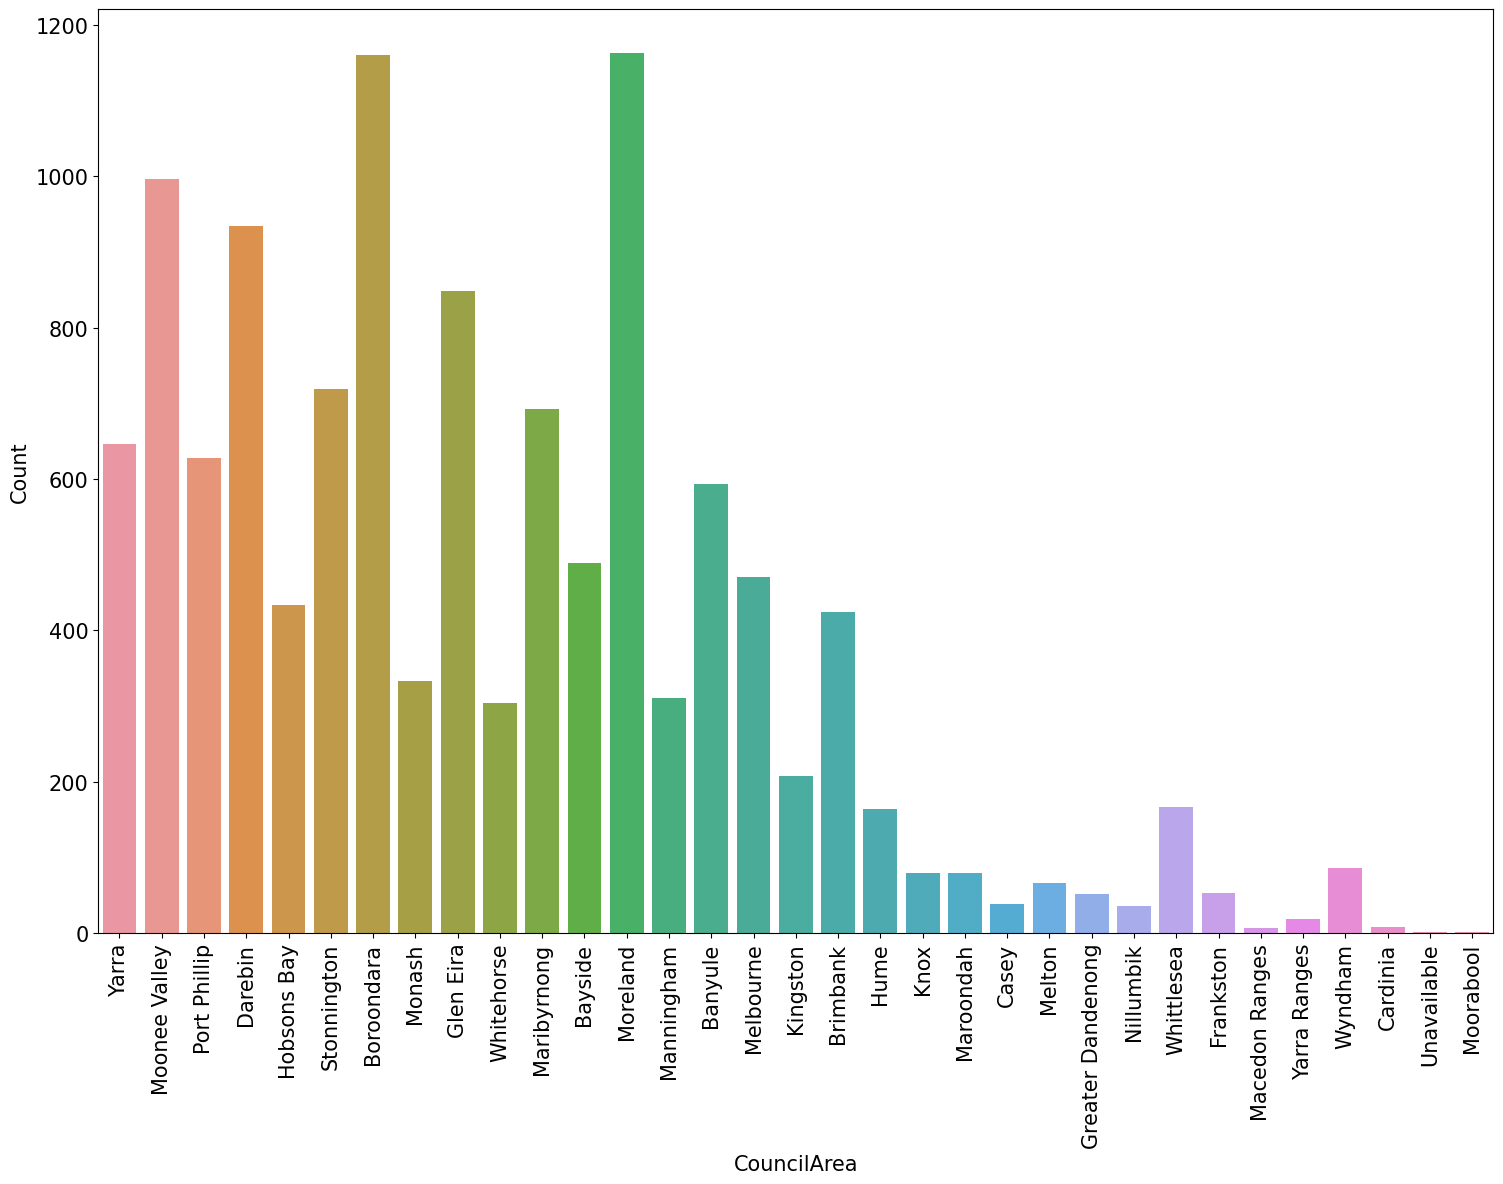

In [37]:
plt.figure(figsize=(18,12)) 
sns.countplot(data = data , x = 'CouncilArea')
plt.xticks(fontsize=15, rotation=90) 
plt.yticks(fontsize=15) 
plt.xlabel("CouncilArea",fontsize=15) 
plt.ylabel("Count",fontsize=15) 

In [38]:
data['CouncilArea'].mode()

0    Moreland
Name: CouncilArea, dtype: object

In [39]:
data['CouncilArea'] = data['CouncilArea'].fillna(str(data['CouncilArea'].mode()))

In [40]:
data.CouncilArea.isnull().sum()

0

Text(0, 0.5, 'Count')

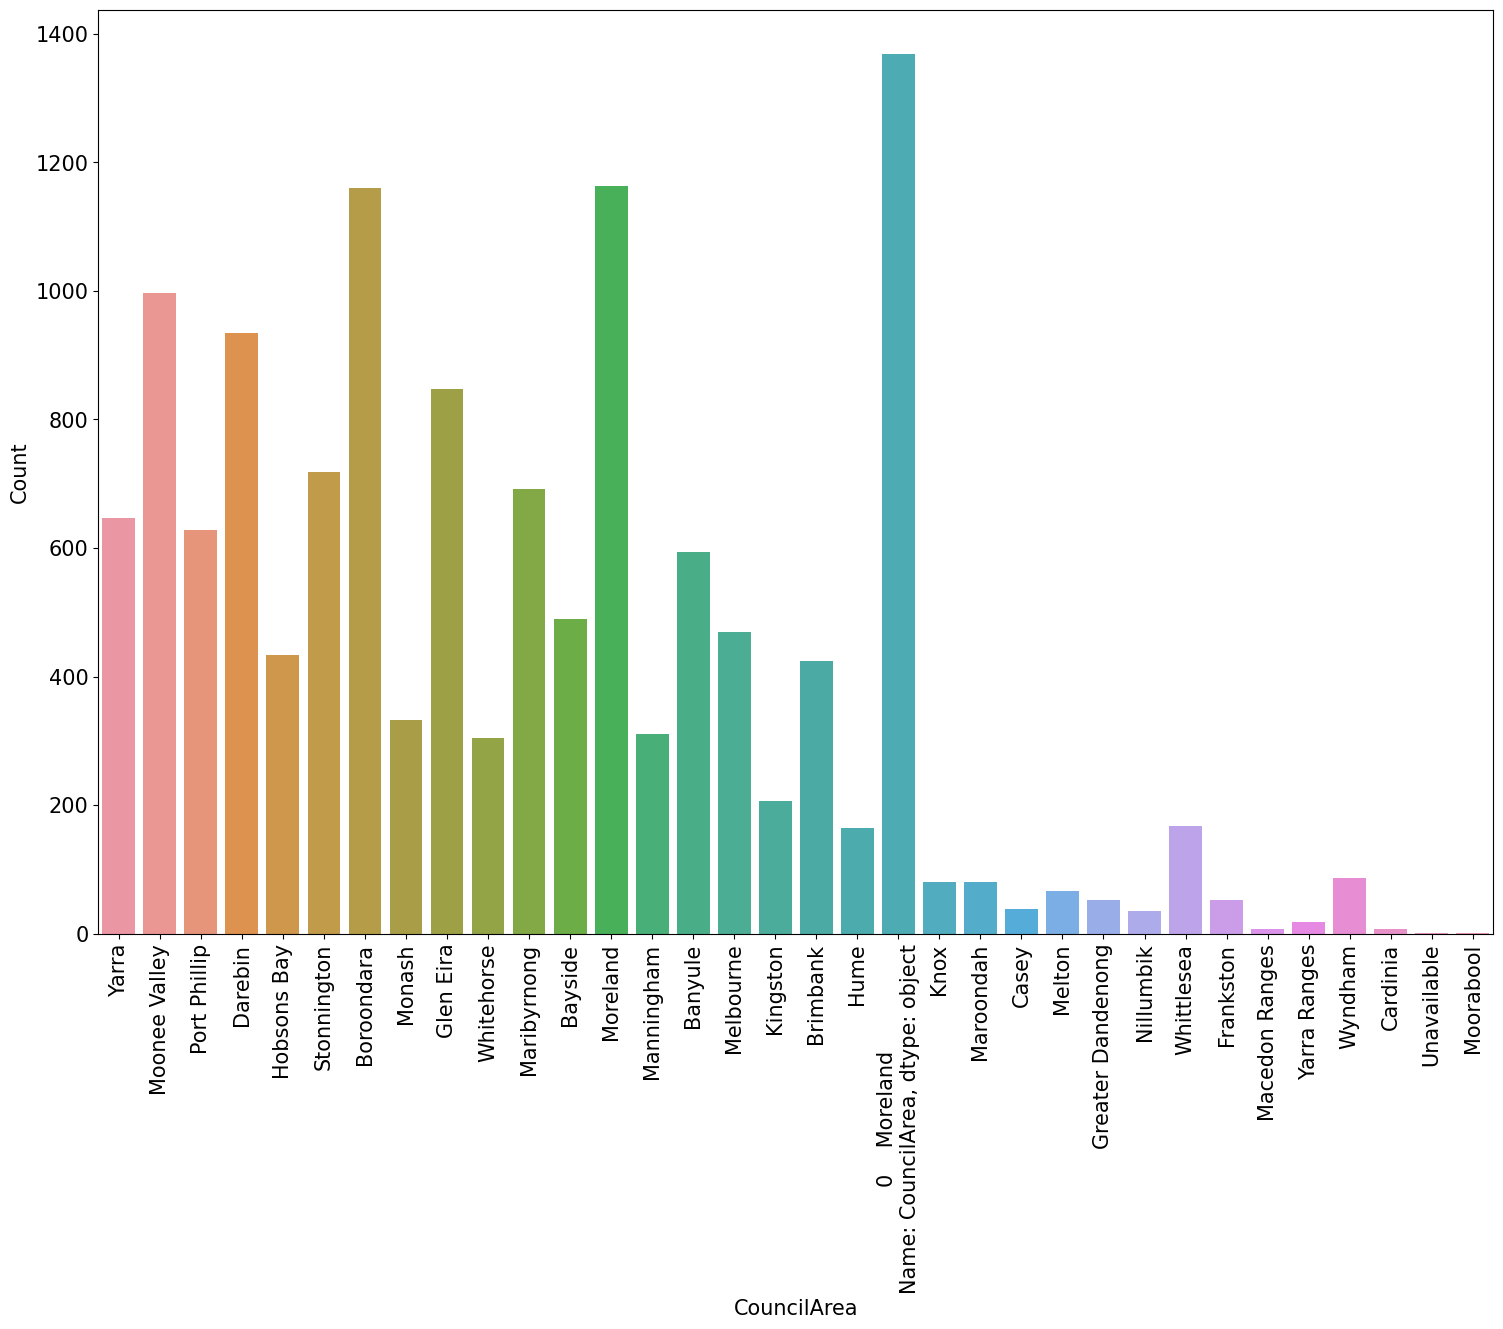

In [41]:
plt.figure(figsize=(18,12)) 
sns.countplot(data = data , x = 'CouncilArea')
plt.xticks(fontsize=15, rotation=90) 
plt.yticks(fontsize=15) 
plt.xlabel("CouncilArea",fontsize=15) 
plt.ylabel("Count",fontsize=15) 

Ooops!! .. We have to fix this issue:

In [42]:
# let's revert everything:
data = last_backup

In [43]:
data.CouncilArea.isnull().sum()

1369

In [44]:
# Save another one just in case:
last_backup_2 = data.copy()

In [45]:
data['CouncilArea'].mode()[0]

'Moreland'

Text(0, 0.5, 'Count')

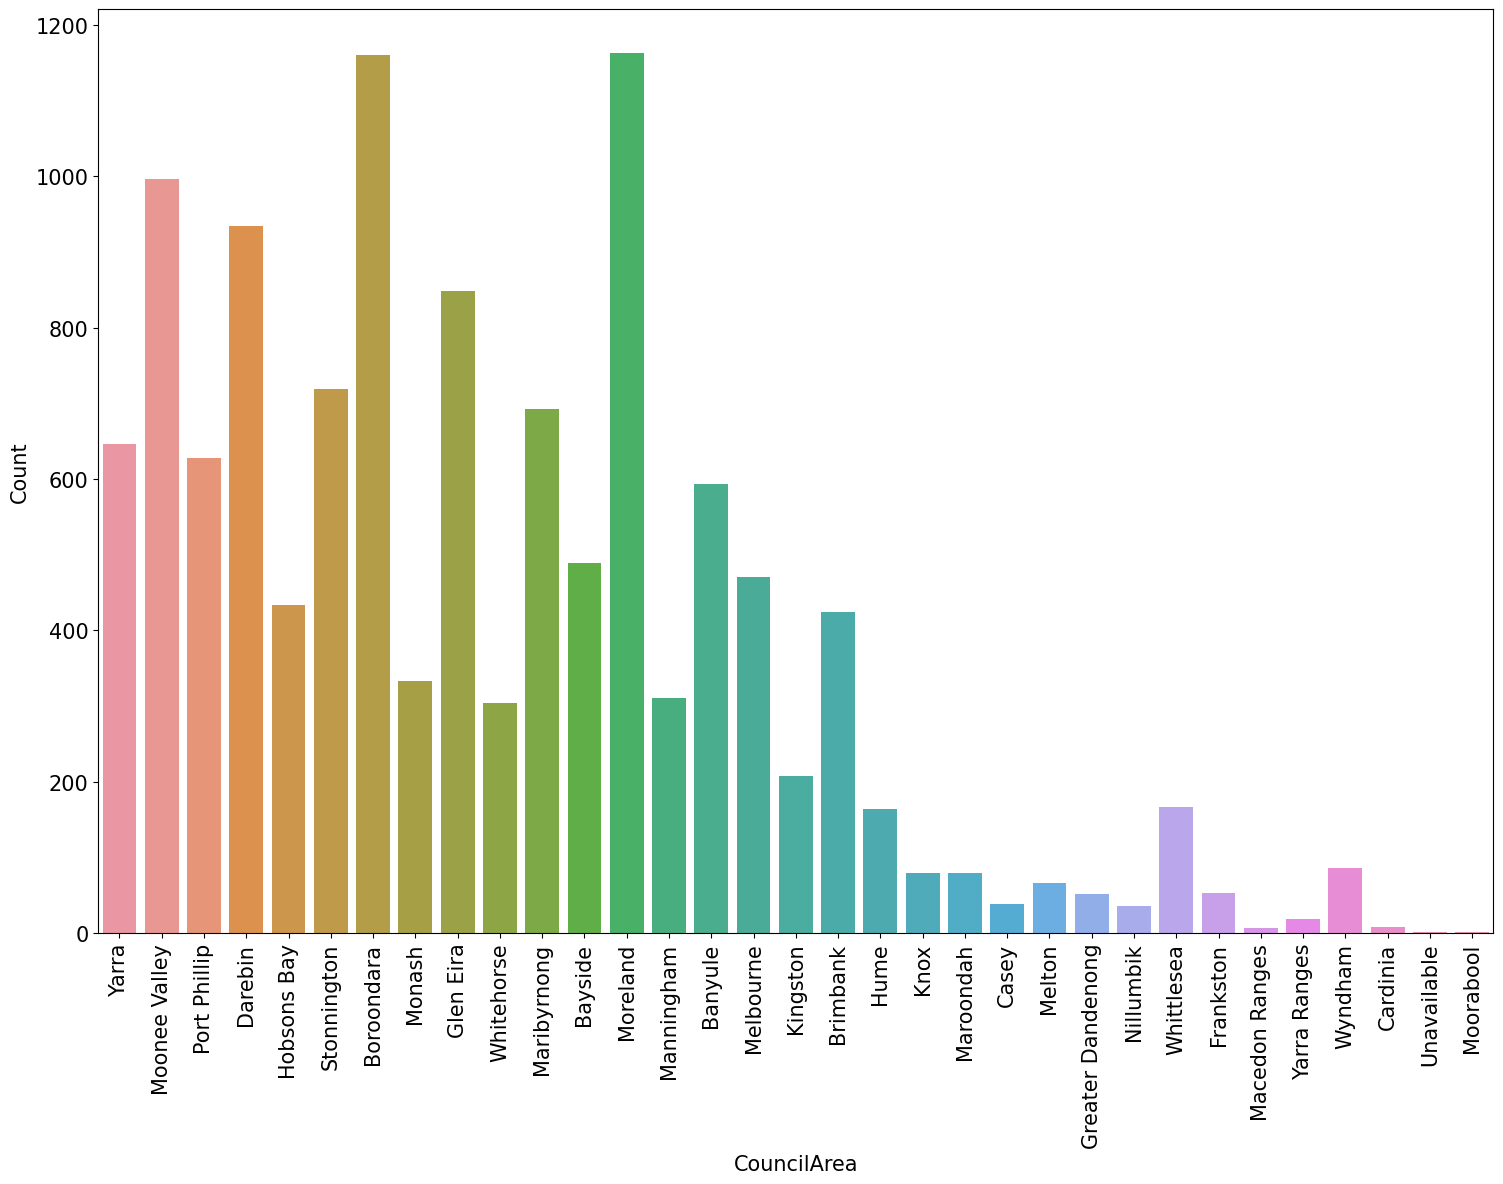

In [46]:
plt.figure(figsize=(18,12)) 
sns.countplot(data = data , x = 'CouncilArea')
plt.xticks(fontsize=15, rotation=90) 
plt.yticks(fontsize=15) 
plt.xlabel("CouncilArea",fontsize=15) 
plt.ylabel("Count",fontsize=15) 

In [47]:
data['CouncilArea'] = data['CouncilArea'].fillna(data['CouncilArea'].mode()[0])

In [48]:
data.CouncilArea.isnull().sum()

0

Text(0, 0.5, 'Count')

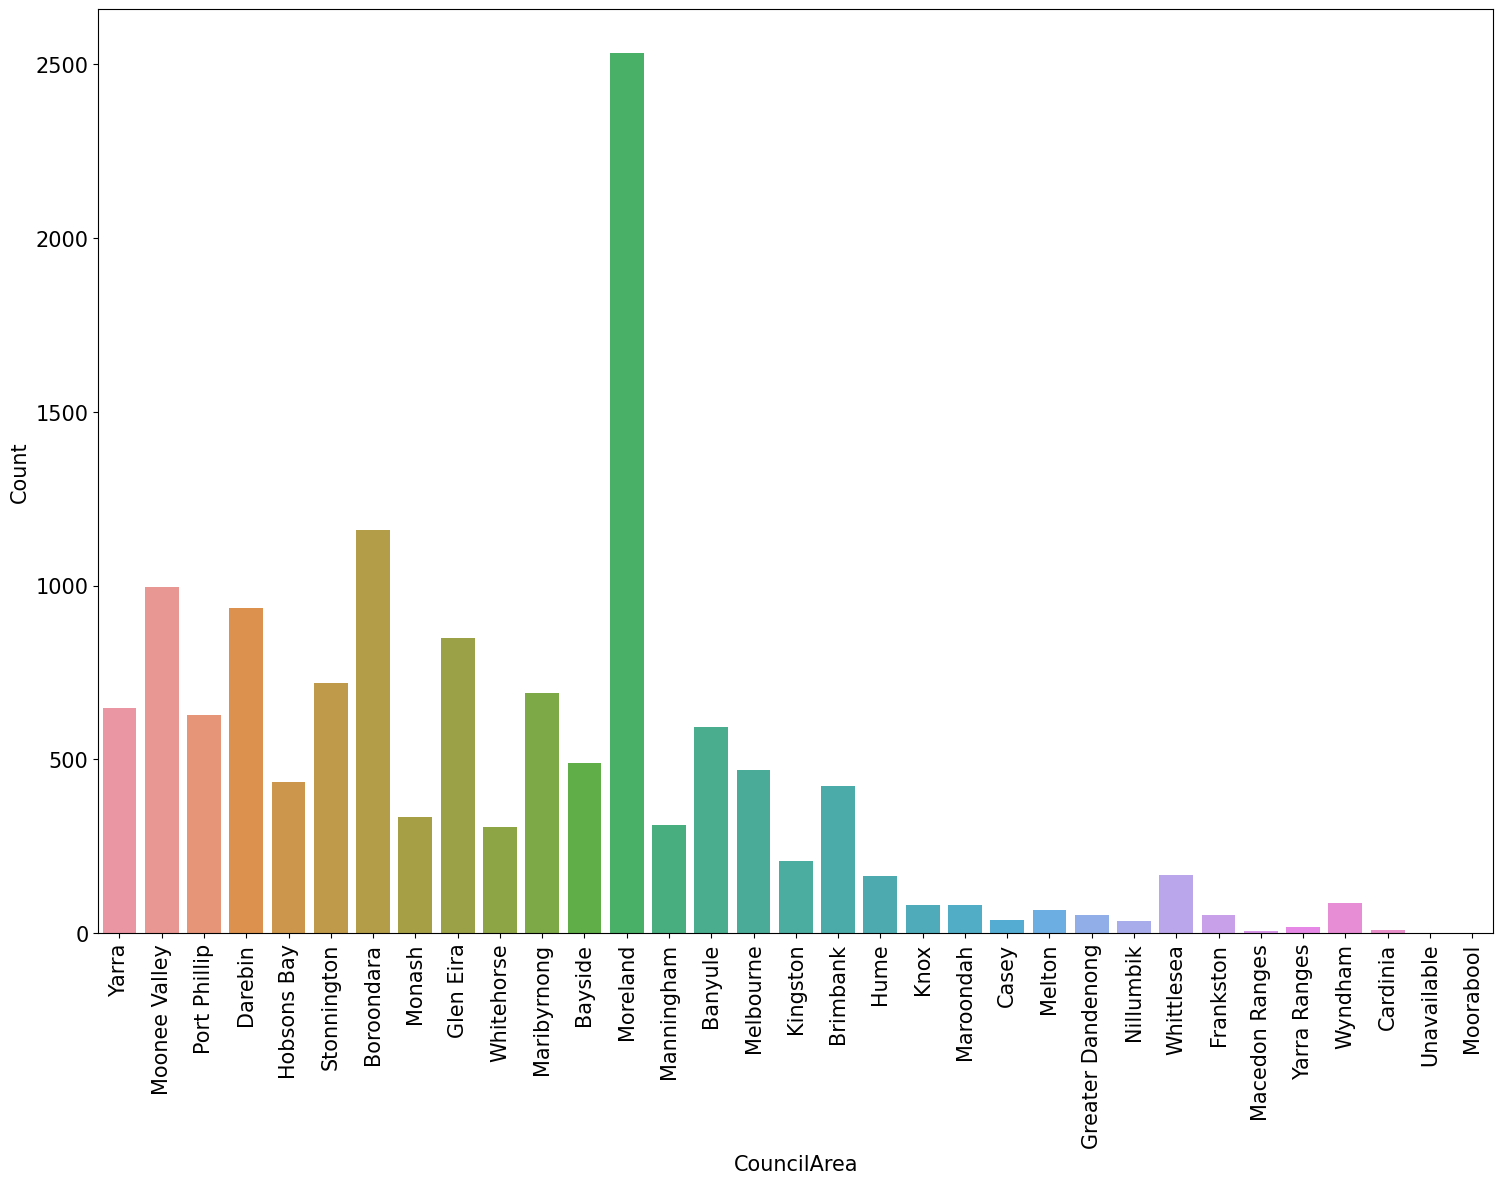

In [49]:
plt.figure(figsize=(18,12)) 
sns.countplot(data = data , x = 'CouncilArea')
plt.xticks(fontsize=15, rotation=90) 
plt.yticks(fontsize=15) 
plt.xlabel("CouncilArea",fontsize=15) 
plt.ylabel("Count",fontsize=15) 

Didn't work either, so we will jump to the randomized Pandas series technique:

In [50]:
data = last_backup_2 # Revert back to the last checkpoint

In [51]:
data.CouncilArea.isnull().sum()

1369

In [52]:
fill_list= data['CouncilArea'].dropna()
data["CouncilArea"] = data['CouncilArea'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

In [53]:
data.CouncilArea.isnull().sum()

0

Text(0, 0.5, 'Count')

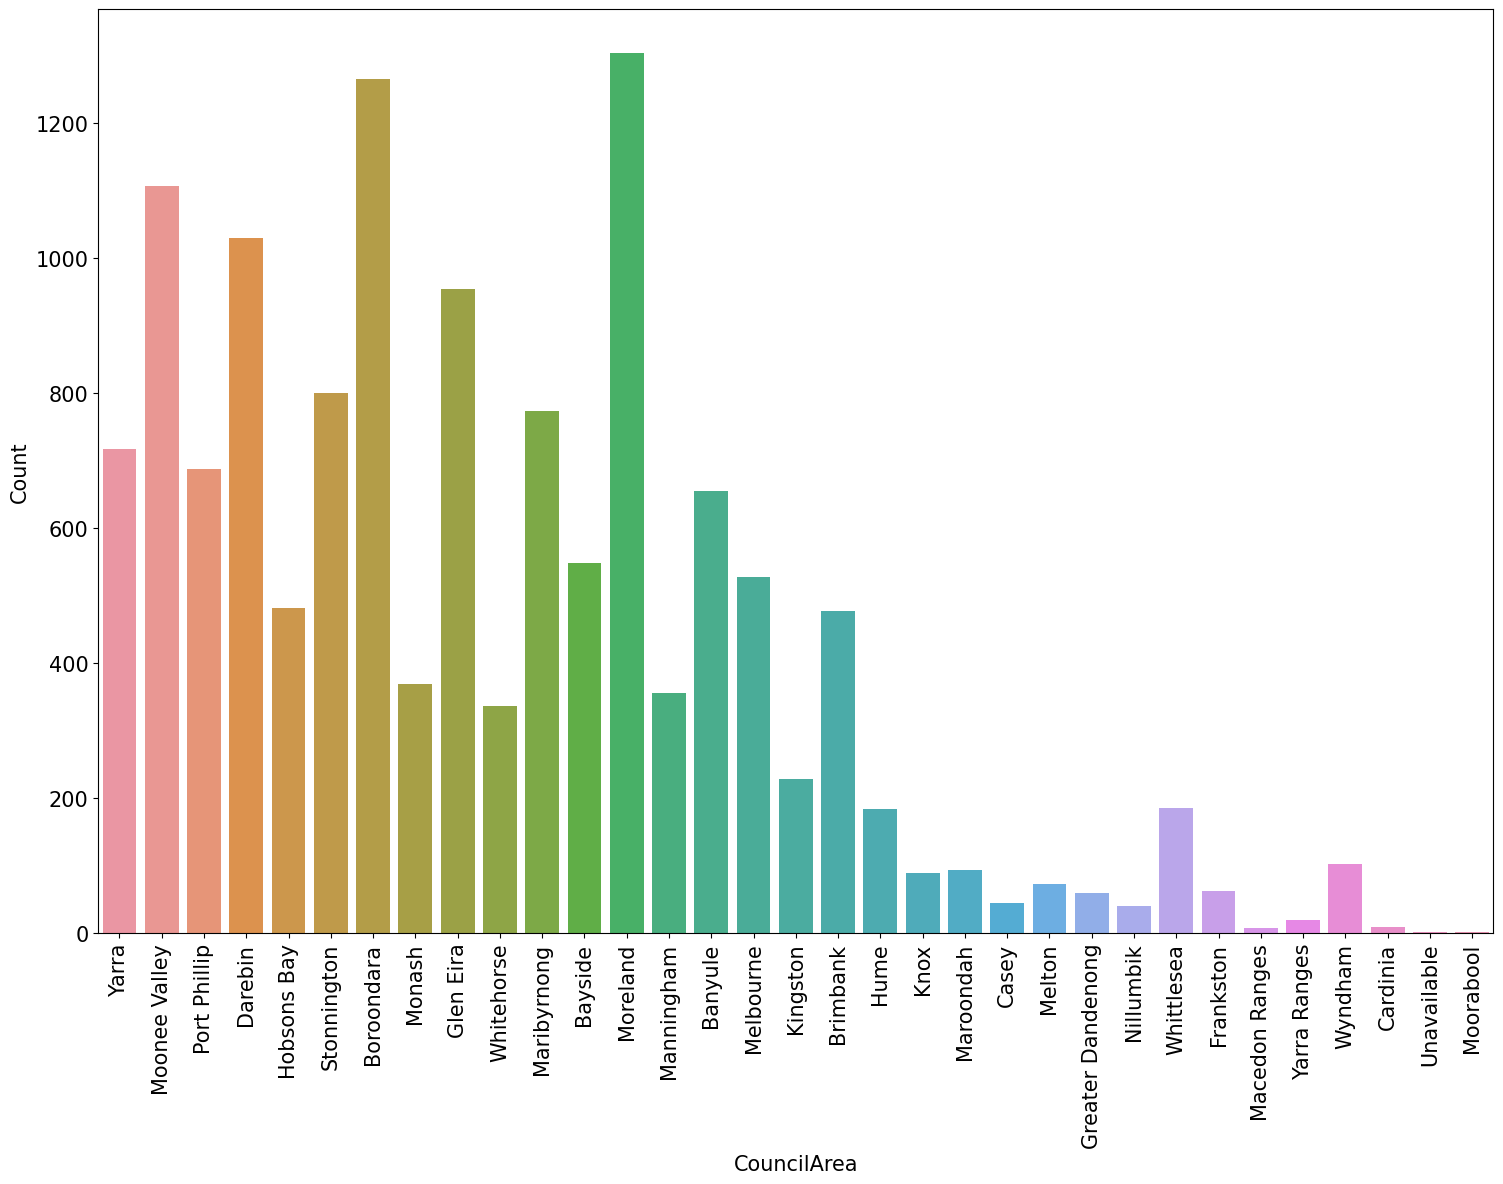

In [54]:
plt.figure(figsize=(18,12)) 
sns.countplot(data = data , x = 'CouncilArea')
plt.xticks(fontsize=15, rotation=90) 
plt.yticks(fontsize=15) 
plt.xlabel("CouncilArea",fontsize=15) 
plt.ylabel("Count",fontsize=15) 

Finally!!

In [55]:
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

Voila!! 

Now we have a clean data with no missing values. Let's continue our Data Preprocessing process:

In [56]:
data

Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Biggin   3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0   
1        Biggin   4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0   
2        Biggin   4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0   
3        Biggin   4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0   
4        Nelson   4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0   
...         ...         ...       ...       ...  ...       ...  ...       ...   
13575     Barry  26/08/2017      16.7    3150.0  ...       2.0  2.0     652.0   
13576  Williams  26/08/2017       6.8    3016.0  ...       2.0  2.0     333.0   
13577     Raine  26/08/2017       6.8    3016.0  ...       2.0  4.0     436.0   
13578   Sweeney  26/08/2017       6.8    3016.0  ...       1.0  5.0     866.0   
13579   Village  26/08/2017       6.3    3013.0  ...       1.0  1.0     362.0   

       BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
0             127.0     1921.0        Yarra -37.79960   144.99840   
1              79.0     1900.0        Yarra -37.80790   144.99340   
2             150.0     1900.0        Yarra -37.80930   144.99440   
3             120.0     1930.0        Yarra -37.79690   144.99690   
4             142.0     2014.0        Yarra -37.80720   144.99410   
...             ...        ...          ...       ...         ...   
13575         172.0     1981.0   Boroondara -37.90562   145.16761   
13576         133.0     1995.0     Kingston -37.85927   144.87904   
13577         126.0     1997.0  Stonnington -37.85274   144.88738   
13578         157.0     1920.0    Melbourne -37.85908   144.89299   
13579         112.0     1920.0   Boroondara -37.81188   144.88449   

                       Regionname Propertycount  
0           Northern Metropolitan        4019.0  
1           Northern Metropolitan        4019.0  
2           Northern Metropolitan        4019.0  
3           Northern Metropolitan        4019.0  
4           Northern Metropolitan        4019.0  
...                           ...           ...  
13575  South-Eastern Metropolitan        7392.0  
13576        Western Metropolitan        6380.0  
13577        Western Metropolitan        6380.0  
13578        Western Metropolitan        6380.0  
13579        Western Metropolitan        6543.0  

[13580 rows x 21 columns]

Now, we need to do some encoding on our categorical features.

-------------------------

## Encoding Process

In [57]:
df = data.copy()

In [58]:
df.drop(["Date",'Address'], axis = 1 , inplace = True)

In [59]:
df

Suburb  Rooms Type      Price Method   SellerG  Distance  \
0         Abbotsford      2    h  1480000.0      S    Biggin       2.5   
1         Abbotsford      2    h  1035000.0      S    Biggin       2.5   
2         Abbotsford      3    h  1465000.0     SP    Biggin       2.5   
3         Abbotsford      3    h   850000.0     PI    Biggin       2.5   
4         Abbotsford      4    h  1600000.0     VB    Nelson       2.5   
...              ...    ...  ...        ...    ...       ...       ...   
13575  Wheelers Hill      4    h  1245000.0      S     Barry      16.7   
13576   Williamstown      3    h  1031000.0     SP  Williams       6.8   
13577   Williamstown      3    h  1170000.0      S     Raine       6.8   
13578   Williamstown      4    h  2500000.0     PI   Sweeney       6.8   
13579     Yarraville      4    h  1285000.0     SP   Village       6.3   

       Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
0        3067.0       2.0       1.0  1.0     202.0         127.0     1921.0   
1        3067.0       2.0       1.0  0.0     156.0          79.0     1900.0   
2        3067.0       3.0       2.0  0.0     134.0         150.0     1900.0   
3        3067.0       3.0       2.0  1.0      94.0         120.0     1930.0   
4        3067.0       3.0       1.0  2.0     120.0         142.0     2014.0   
...         ...       ...       ...  ...       ...           ...        ...   
13575    3150.0       4.0       2.0  2.0     652.0         172.0     1981.0   
13576    3016.0       3.0       2.0  2.0     333.0         133.0     1995.0   
13577    3016.0       3.0       2.0  4.0     436.0         126.0     1997.0   
13578    3016.0       4.0       1.0  5.0     866.0         157.0     1920.0   
13579    3013.0       4.0       1.0  1.0     362.0         112.0     1920.0   

       CouncilArea  Lattitude  Longtitude                  Regionname  \
0            Yarra  -37.79960   144.99840       Northern Metropolitan   
1            Yarra  -37.80790   144.99340       Northern Metropolitan   
2            Yarra  -37.80930   144.99440       Northern Metropolitan   
3            Yarra  -37.79690   144.99690       Northern Metropolitan   
4            Yarra  -37.80720   144.99410       Northern Metropolitan   
...            ...        ...         ...                         ...   
13575   Boroondara  -37.90562   145.16761  South-Eastern Metropolitan   
13576     Kingston  -37.85927   144.87904        Western Metropolitan   
13577  Stonnington  -37.85274   144.88738        Western Metropolitan   
13578    Melbourne  -37.85908   144.89299        Western Metropolitan   
13579   Boroondara  -37.81188   144.88449        Western Metropolitan   

       Propertycount  
0             4019.0  
1             4019.0  
2             4019.0  
3             4019.0  
4             4019.0  
...              ...  
13575         7392.0  
13576         6380.0  
13577         6380.0  
13578         6380.0  
13579         6543.0  

[13580 rows x 19 columns]

In [60]:
from sklearn.preprocessing import OrdinalEncoder

In [61]:
ord_enc = OrdinalEncoder()

In [62]:
df.loc[: , ['Suburb', 'Type', 'Method', 'SellerG', 
            'CouncilArea', 'Regionname']] = ord_enc.fit_transform(df[['Suburb', 'Type', 'Method', 'SellerG',
                                                                      'CouncilArea', 'Regionname']])

C:\Users\raedt\AppData\Local\Temp\ipykernel_10780\1709008002.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[: , ['Suburb', 'Type', 'Method', 'SellerG',


In [63]:
df

Suburb  Rooms  Type      Price  Method  SellerG  Distance  Postcode  \
0         0.0      2   0.0  1480000.0     1.0     23.0       2.5    3067.0   
1         0.0      2   0.0  1035000.0     1.0     23.0       2.5    3067.0   
2         0.0      3   0.0  1465000.0     3.0     23.0       2.5    3067.0   
3         0.0      3   0.0   850000.0     0.0     23.0       2.5    3067.0   
4         0.0      4   0.0  1600000.0     4.0    155.0       2.5    3067.0   
...       ...    ...   ...        ...     ...      ...       ...       ...   
13575   302.0      4   0.0  1245000.0     1.0     16.0      16.7    3150.0   
13576   305.0      3   0.0  1031000.0     3.0    251.0       6.8    3016.0   
13577   305.0      3   0.0  1170000.0     1.0    194.0       6.8    3016.0   
13578   305.0      4   0.0  2500000.0     0.0    222.0       6.8    3016.0   
13579   313.0      4   0.0  1285000.0     3.0    239.0       6.3    3013.0   

       Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
0           2.0       1.0  1.0     202.0         127.0     1921.0   
1           2.0       1.0  0.0     156.0          79.0     1900.0   
2           3.0       2.0  0.0     134.0         150.0     1900.0   
3           3.0       2.0  1.0      94.0         120.0     1930.0   
4           3.0       1.0  2.0     120.0         142.0     2014.0   
...         ...       ...  ...       ...           ...        ...   
13575       4.0       2.0  2.0     652.0         172.0     1981.0   
13576       3.0       2.0  2.0     333.0         133.0     1995.0   
13577       3.0       2.0  4.0     436.0         126.0     1997.0   
13578       4.0       1.0  5.0     866.0         157.0     1920.0   
13579       4.0       1.0  1.0     362.0         112.0     1920.0   

       CouncilArea  Lattitude  Longtitude  Regionname  Propertycount  
0             31.0  -37.79960   144.99840         2.0         4019.0  
1             31.0  -37.80790   144.99340         2.0         4019.0  
2             31.0  -37.80930   144.99440         2.0         4019.0  
3             31.0  -37.79690   144.99690         2.0         4019.0  
4             31.0  -37.80720   144.99410         2.0         4019.0  
...            ...        ...         ...         ...            ...  
13575          2.0  -37.90562   145.16761         4.0         7392.0  
13576         12.0  -37.85927   144.87904         6.0         6380.0  
13577         26.0  -37.85274   144.88738         6.0         6380.0  
13578         18.0  -37.85908   144.89299         6.0         6380.0  
13579          2.0  -37.81188   144.88449         6.0         6543.0  

[13580 rows x 19 columns]

Nice! 

Now our data is ready for some scaling.

------------------

## Scaling Process

Suburb              Axes(0.125,0.712609;0.133621x0.167391)
Rooms            Axes(0.285345,0.712609;0.133621x0.167391)
Type              Axes(0.44569,0.712609;0.133621x0.167391)
Price            Axes(0.606034,0.712609;0.133621x0.167391)
Method           Axes(0.766379,0.712609;0.133621x0.167391)
SellerG             Axes(0.125,0.511739;0.133621x0.167391)
Distance         Axes(0.285345,0.511739;0.133621x0.167391)
Postcode          Axes(0.44569,0.511739;0.133621x0.167391)
Bedroom2         Axes(0.606034,0.511739;0.133621x0.167391)
Bathroom         Axes(0.766379,0.511739;0.133621x0.167391)
Car                  Axes(0.125,0.31087;0.133621x0.167391)
Landsize          Axes(0.285345,0.31087;0.133621x0.167391)
BuildingArea       Axes(0.44569,0.31087;0.133621x0.167391)
YearBuilt         Axes(0.606034,0.31087;0.133621x0.167391)
CouncilArea       Axes(0.766379,0.31087;0.133621x0.167391)
Lattitude               Axes(0.125,0.11;0.133621x0.167391)
Longtitude           Axes(0.285345,0.11;0.133621x0.16739

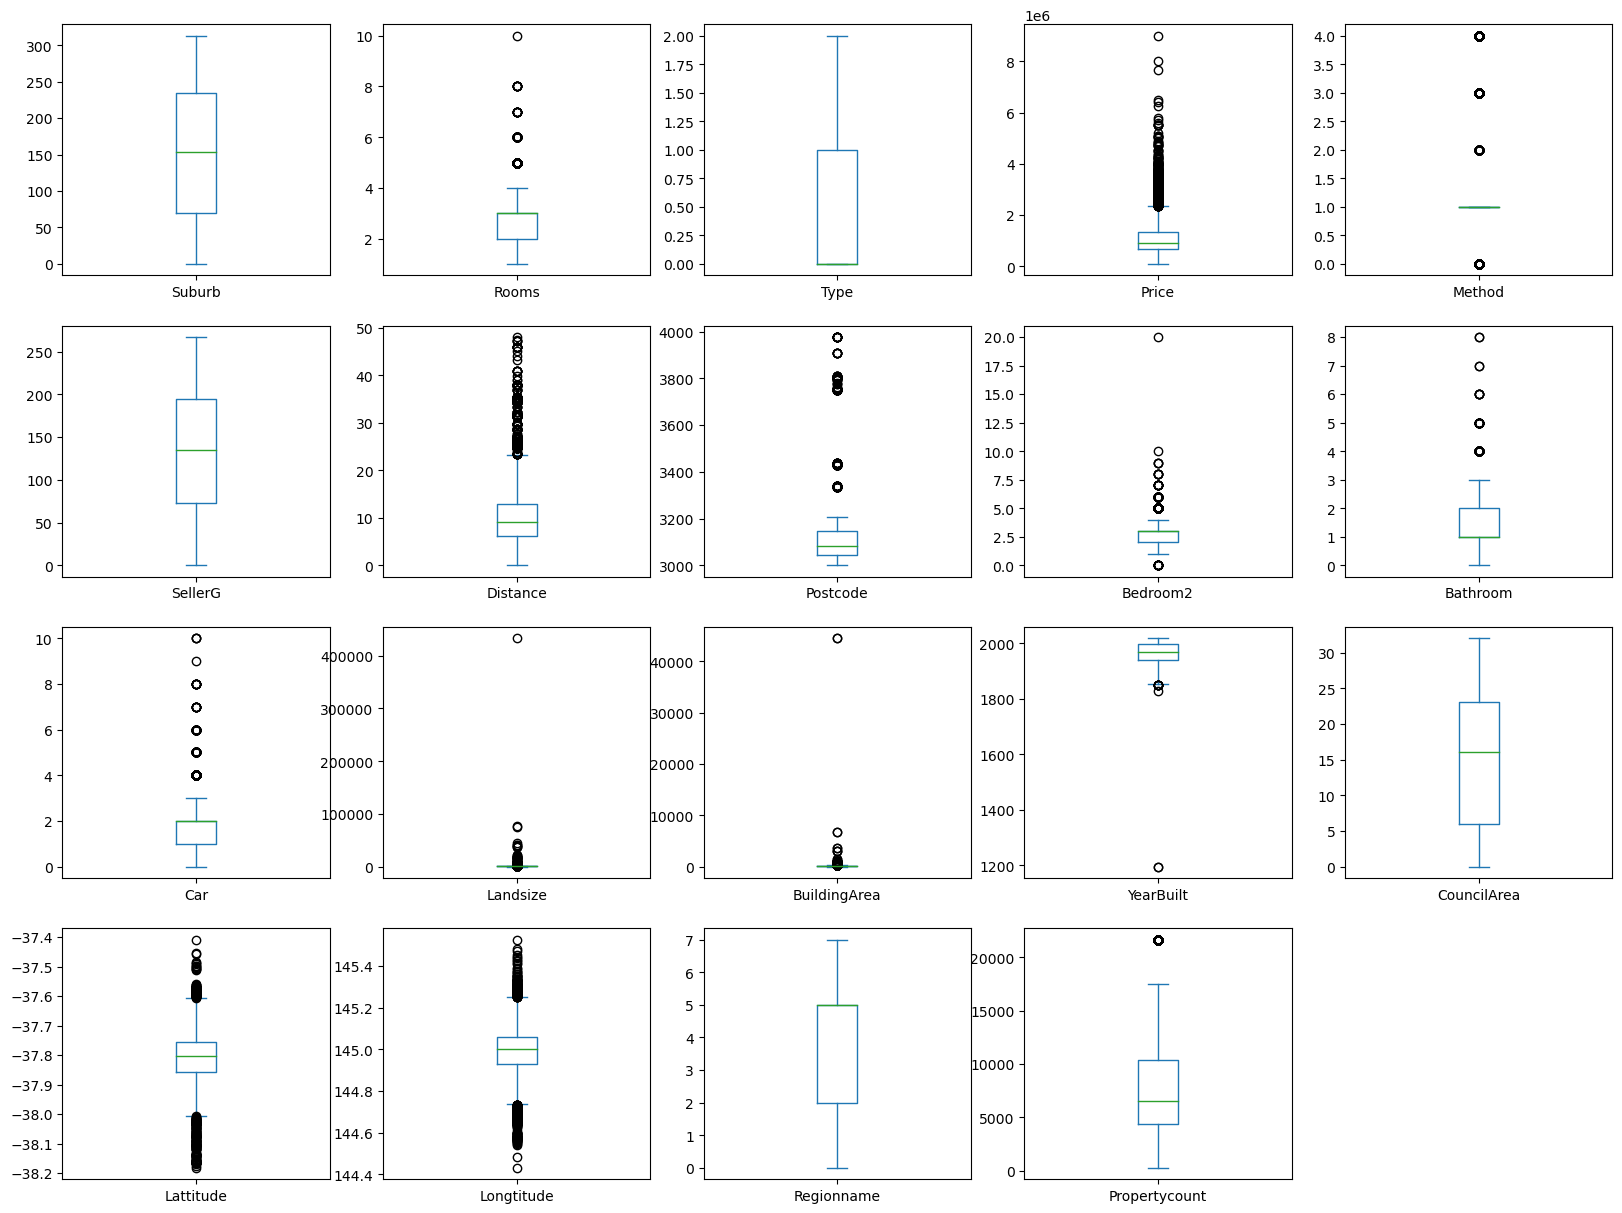

In [64]:
df.plot(kind = "box" , subplots = True , figsize = (20,15), layout = (4,5))

As we can see we have some significant outliers, and we are not going to drop anything; so let's try and handle them one by one:

In [65]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [66]:
stan = StandardScaler()
rob = RobustScaler ()

In [67]:
import plotly.express as px
fig = px.box (df, x = "Distance")
fig.show()

In [68]:
df['Distance'] = rob.fit_transform(df[['Distance']])

In [69]:
import plotly.express as px
fig = px.box (df, x = "Distance")
fig.show()

Seems like it's not going to be an easy task.

Alright we will try to apply the "Robust Regression" model later on, and see what happens. 

In [70]:
df['Distance'] = rob.inverse_transform(df[['Distance']])

In [71]:
df

Suburb  Rooms  Type      Price  Method  SellerG  Distance  Postcode  \
0         0.0      2   0.0  1480000.0     1.0     23.0       2.5    3067.0   
1         0.0      2   0.0  1035000.0     1.0     23.0       2.5    3067.0   
2         0.0      3   0.0  1465000.0     3.0     23.0       2.5    3067.0   
3         0.0      3   0.0   850000.0     0.0     23.0       2.5    3067.0   
4         0.0      4   0.0  1600000.0     4.0    155.0       2.5    3067.0   
...       ...    ...   ...        ...     ...      ...       ...       ...   
13575   302.0      4   0.0  1245000.0     1.0     16.0      16.7    3150.0   
13576   305.0      3   0.0  1031000.0     3.0    251.0       6.8    3016.0   
13577   305.0      3   0.0  1170000.0     1.0    194.0       6.8    3016.0   
13578   305.0      4   0.0  2500000.0     0.0    222.0       6.8    3016.0   
13579   313.0      4   0.0  1285000.0     3.0    239.0       6.3    3013.0   

       Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
0           2.0       1.0  1.0     202.0         127.0     1921.0   
1           2.0       1.0  0.0     156.0          79.0     1900.0   
2           3.0       2.0  0.0     134.0         150.0     1900.0   
3           3.0       2.0  1.0      94.0         120.0     1930.0   
4           3.0       1.0  2.0     120.0         142.0     2014.0   
...         ...       ...  ...       ...           ...        ...   
13575       4.0       2.0  2.0     652.0         172.0     1981.0   
13576       3.0       2.0  2.0     333.0         133.0     1995.0   
13577       3.0       2.0  4.0     436.0         126.0     1997.0   
13578       4.0       1.0  5.0     866.0         157.0     1920.0   
13579       4.0       1.0  1.0     362.0         112.0     1920.0   

       CouncilArea  Lattitude  Longtitude  Regionname  Propertycount  
0             31.0  -37.79960   144.99840         2.0         4019.0  
1             31.0  -37.80790   144.99340         2.0         4019.0  
2             31.0  -37.80930   144.99440         2.0         4019.0  
3             31.0  -37.79690   144.99690         2.0         4019.0  
4             31.0  -37.80720   144.99410         2.0         4019.0  
...            ...        ...         ...         ...            ...  
13575          2.0  -37.90562   145.16761         4.0         7392.0  
13576         12.0  -37.85927   144.87904         6.0         6380.0  
13577         26.0  -37.85274   144.88738         6.0         6380.0  
13578         18.0  -37.85908   144.89299         6.0         6380.0  
13579          2.0  -37.81188   144.88449         6.0         6543.0  

[13580 rows x 19 columns]

In [72]:
df['Type'].value_counts()

0.0    9449
2.0    3017
1.0    1114
Name: Type, dtype: int64

In [73]:
df['Method'].value_counts()

1.0    9022
3.0    1703
0.0    1564
4.0    1199
2.0      92
Name: Method, dtype: int64

In [74]:
df.loc[: , ['Suburb',  'SellerG','Distance', 'Postcode', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Propertycount']] = stan.fit_transform(df[['Suburb',  'SellerG','Distance', 'Postcode', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Propertycount']])

In [75]:
df

Suburb  Rooms  Type      Price  Method   SellerG  Distance  Postcode  \
0     -1.719825      2   0.0  1480000.0     1.0 -1.386938 -1.301485 -0.422415   
1     -1.719825      2   0.0  1035000.0     1.0 -1.386938 -1.301485 -0.422415   
2     -1.719825      3   0.0  1465000.0     3.0 -1.386938 -1.301485 -0.422415   
3     -1.719825      3   0.0   850000.0     0.0 -1.386938 -1.301485 -0.422415   
4     -1.719825      4   0.0  1600000.0     4.0  0.311181 -1.301485 -0.422415   
...         ...    ...   ...        ...     ...       ...       ...       ...   
13575  1.624415      4   0.0  1245000.0     1.0 -1.476990  1.118210  0.492956   
13576  1.657636      3   0.0  1031000.0     3.0  1.546176 -0.568761 -0.984872   
13577  1.657636      3   0.0  1170000.0     1.0  0.812898 -0.568761 -0.984872   
13578  1.657636      4   0.0  2500000.0     0.0  1.173105 -0.568761 -0.984872   
13579  1.746225      4   0.0  1285000.0     3.0  1.391802 -0.653961 -1.017958   

       Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
0           2.0       1.0  1.0 -0.089316     -0.046831  -1.176443   
1           2.0       1.0  0.0 -0.100843     -0.133387  -1.739369   
2           3.0       2.0  0.0 -0.106356     -0.005356  -1.739369   
3           3.0       2.0  1.0 -0.116380     -0.059454  -0.935188   
4           3.0       1.0  2.0 -0.109864     -0.019782   1.316517   
...         ...       ...  ...       ...           ...        ...   
13575       4.0       2.0  2.0  0.023452      0.034316   0.431918   
13576       3.0       2.0  2.0 -0.056488     -0.036011   0.807203   
13577       3.0       2.0  4.0 -0.030677     -0.048634   0.860815   
13578       4.0       1.0  5.0  0.077079      0.007267  -1.203249   
13579       4.0       1.0  1.0 -0.049221     -0.073880  -1.203249   

       CouncilArea  Lattitude  Longtitude  Regionname  Propertycount  
0         1.651384   0.121160    0.030640         2.0      -0.784625  
1         1.651384   0.016437   -0.017478         2.0      -0.784625  
2         1.651384  -0.001227   -0.007855         2.0      -0.784625  
3         1.651384   0.155226    0.016204         2.0      -0.784625  
4         1.651384   0.025269   -0.010742         2.0      -0.784625  
...            ...        ...         ...         ...            ...  
13575    -1.302139  -1.216516    1.659041         4.0      -0.014256  
13576    -0.283683  -0.631709   -1.118028         6.0      -0.245389  
13577     1.142156  -0.549318   -1.037767         6.0      -0.245389  
13578     0.327391  -0.629311   -0.983779         6.0      -0.245389  
13579    -1.302139  -0.033780   -1.065579         6.0      -0.208161  

[13580 rows x 19 columns]

Nice, now we are ready to train our model:

------------------------------

## Model Training

We need first to split our data into two parts one for training and the other for testing:

In [76]:
from sklearn.model_selection import train_test_split

Obviously our target is the Price, so we need to remove it from our train and test data, and give it a "y" label for modeling:

In [77]:
x = df.drop("Price" , axis = 1)
y = df['Price']

In [78]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state= 42)

Let's see our parts' dimensions:

In [79]:
print (df.shape) # Original shape
print (x.shape)
print (x_train.shape)
print (x_test.shape)

(13580, 19)
(13580, 18)
(10185, 18)
(3395, 18)


### Let's first apply the  "Linear Regression" model

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
reg = LinearRegression()

In [82]:
reg.fit(x_train , y_train)

LinearRegression()

In [83]:
reg.score(x_train , y_train)

0.5673246085489305

In [84]:
reg.score(x_test , y_test)

0.5816309972555723

Since the test score is higher than the train score (which makes no sense), then we deduce that the model doesn't fit our data.

In [85]:
reg.intercept_

176771.1449130947

In [86]:
reg.coef_

array([ -38879.94167788,  162390.34117109, -237626.72603383,
         -5358.84881908,  -12383.83678372, -302434.16432995,
         86750.4073426 ,   18682.14307293,  202025.32804834,
         40413.46182745,   71044.89164345,   11544.46544813,
        -52385.96610833,  -32228.3047077 ,  -80546.87367052,
        118284.52638195,   32605.11907414,     679.50125488])

In [87]:
df2 = pd.DataFrame(reg.coef_ , df.columns[:-1] , columns= ['Coeficient'])

In [88]:
df2.sort_values("Coeficient" , ascending= False)

Coeficient
Bedroom2      202025.328048
Rooms         162390.341171
Lattitude     118284.526382
Distance       86750.407343
Car            71044.891643
Bathroom       40413.461827
Longtitude     32605.119074
Postcode       18682.143073
Landsize       11544.465448
Regionname       679.501255
Price          -5358.848819
Method        -12383.836784
YearBuilt     -32228.304708
Suburb        -38879.941678
BuildingArea  -52385.966108
CouncilArea   -80546.873671
Type         -237626.726034
SellerG      -302434.164330

### Secondly, let's try the "Ridge Regression" model

In [89]:
from sklearn.linear_model import Ridge

In [90]:
rid = Ridge( alpha=0.8)

In [91]:
rid.fit(x_train , y_train)

Ridge(alpha=0.8)

In [92]:
print (rid.score(x_train , y_train))
print (rid.score(x_test , y_test))

0.5673245990902396
0.5816883583842841


### Now, let's try the "Robust Regression" model

In [93]:
from sklearn.linear_model import RANSACRegressor

In [94]:
ransac = RANSACRegressor()

In [95]:
ransac.fit(x_train , y_train)

RANSACRegressor()

In [96]:
ransac.score(x_train , y_train)

0.01048679902630667

In [97]:
ransac.score(x_test , y_test)

-9.53828453076091

### let's try another model (non-linear)

In [98]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [99]:
print (rf.score(x_train , y_train))
print (rf.score(x_test , y_test))

0.8916541457493437
0.7843529202608506


Now we are sure, that the problem was coming from using a linear model on a non linear data.

We can notice that the last model we used has some overfitting; and that's due to the use of the filled features "BuildingArea" anf "YearBuilt" that had major missing values, and logically it doesn't make any sense to use features with filled (predicted) values to predict the price.

That might also be due to the existence of some outliers in our data, that i intend to come back to this notebook in the near future in order to handle those outliers.

------------------

And here you have it!